<a href="https://colab.research.google.com/github/AntonioFuziy/iris_recognition/blob/main/Iris_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Detection

**Alunos: Antonio Fuziy e Victor Vergara**

_________

Lines to add image files and G6_IrisRecognition lib

In [91]:
!git clone https://github.com/lucianosilva-github/G6_iris_recognition.git

fatal: destination path 'G6_iris_recognition' already exists and is not an empty directory.


In [92]:
!git clone https://github.com/lucianosilva-github/images-tutorial.git

fatal: destination path 'images-tutorial' already exists and is not an empty directory.


In [93]:
!git clone https://github.com/lucianosilva-github/images.git

fatal: destination path 'images' already exists and is not an empty directory.


In [94]:
import G6_iris_recognition

In [95]:
import cv2
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import random

In [96]:
def plot_images(array_images, rows, cols):
  n_rows = rows
  n_cols = cols

  fig = plt.figure(figsize=(20, 15))
  grid = ImageGrid(fig, 111, nrows_ncols=(n_rows, n_cols))

  for figure, img in zip(grid, array_images):
      figure.imshow(img, cmap="gray")

  plt.show()

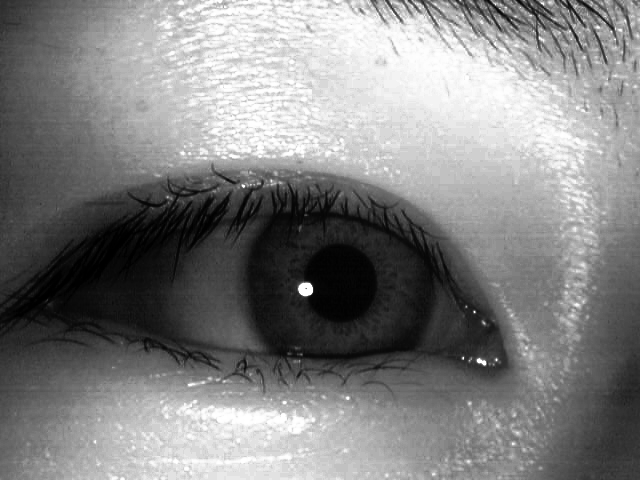

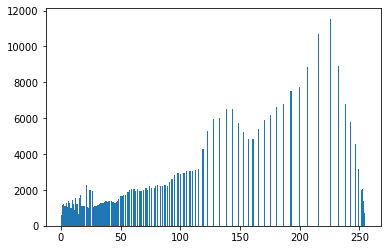

In [97]:
# #seu código vai aqui
image_0002 = cv2.imread("images/0002/0002_019.bmp")

image_gray = cv2.cvtColor(image_0002, cv2.COLOR_BGR2GRAY)

imgeq=cv2.equalizeHist(image_gray)
cv2_imshow(imgeq)
plt.hist(imgeq.ravel(),bins=256,range=[0,255]) 
plt.show()

In [98]:
imgs = []
for i in range(20):
  image_path = f"images/0002/0002_0{i:02d}.bmp"
  image_0002 = cv2.imread(image_path)
  imgs.append(image_0002)
  # cv2.imwrite(image_path, imgeq)
  # print(f"image {i} saved")

In [99]:
imgs_equalized = []
for i in range(20):
  image_path = f"images/0002/0002_0{i:02d}.bmp"
  image_0002 = cv2.imread(image_path)
  image_gray = cv2.cvtColor(image_0002, cv2.COLOR_BGR2GRAY)
  imgeq = cv2.equalizeHist(image_gray)
  imgs_equalized.append(imgeq)
  # cv2.imwrite(image_path, imgeq)
  # print(f"image {i} saved")

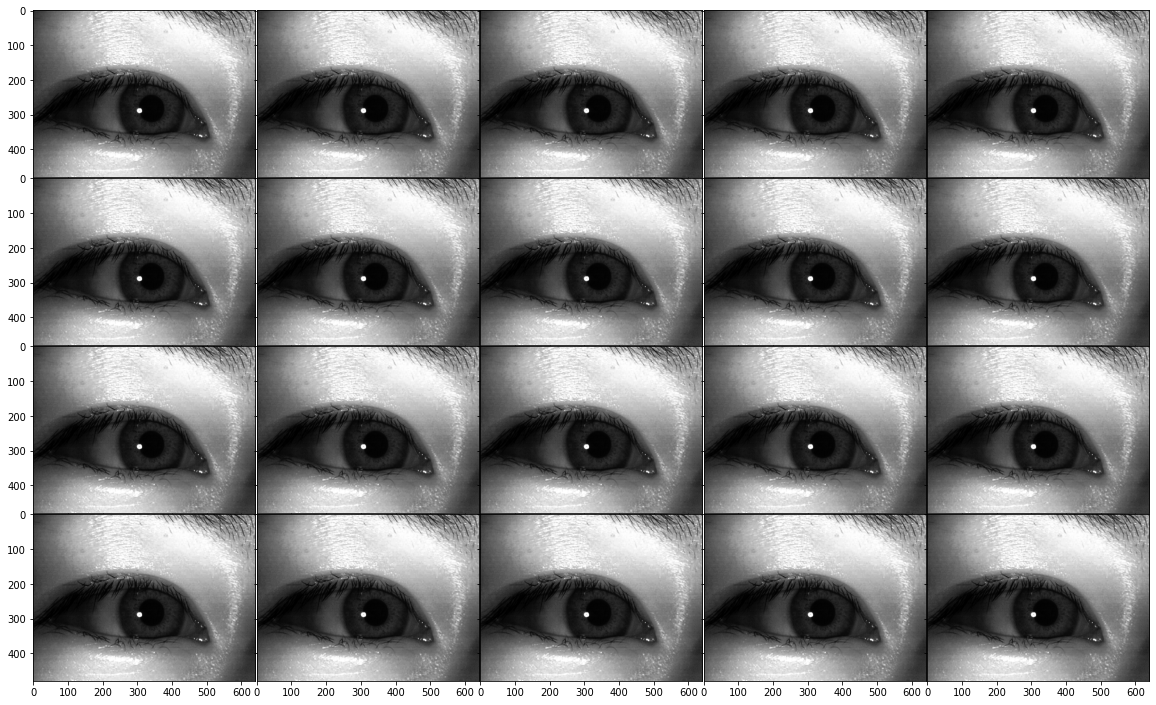

In [100]:
plot_images(imgs_equalized, 4, 5)

### Threshold OTSU

Não foi muito eficiente, pois os tons de cinza são muito extremos, assim

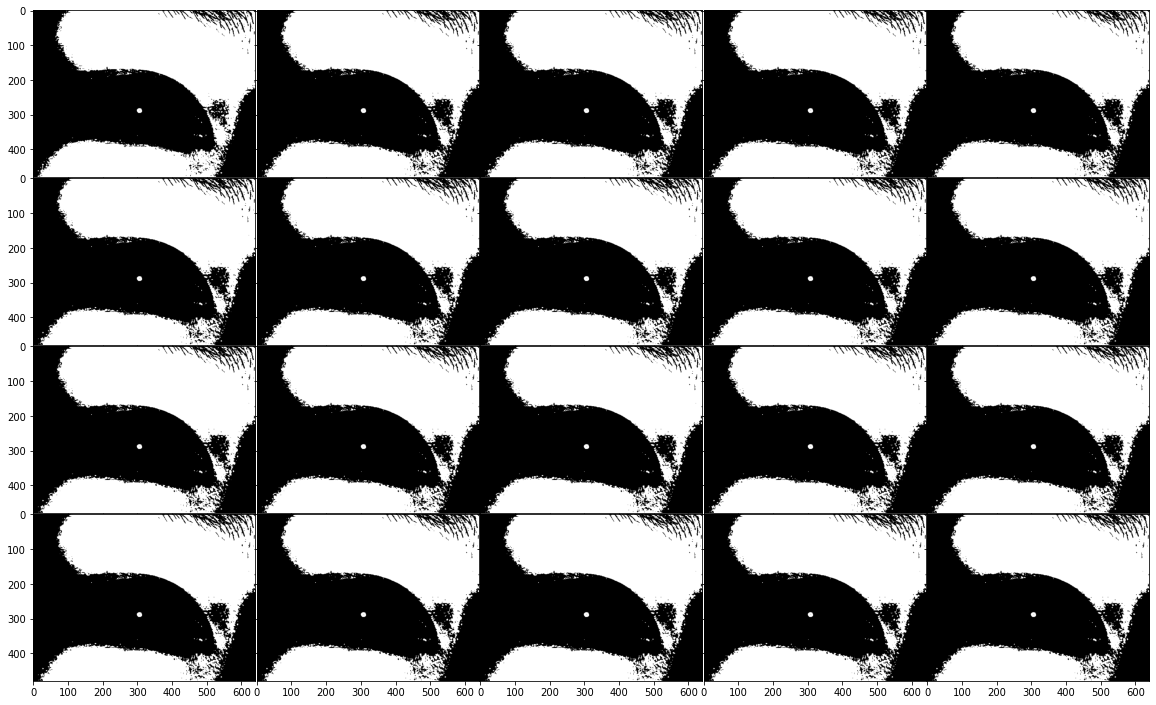

In [101]:
imgs_threshold = []
for img in imgs_equalized:
  T,imgt = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  imgs_threshold.append(imgt)
plot_images(imgs_threshold, 4, 5)

Como se pode ver na imagem acima, o algoritimo de Otsu não é adequado para esse set, provavelemente por caus da grande diferença de cor entre as partes do olho e o resto do rosto. Assim seria necessário aplicar um Threshold adaptativo

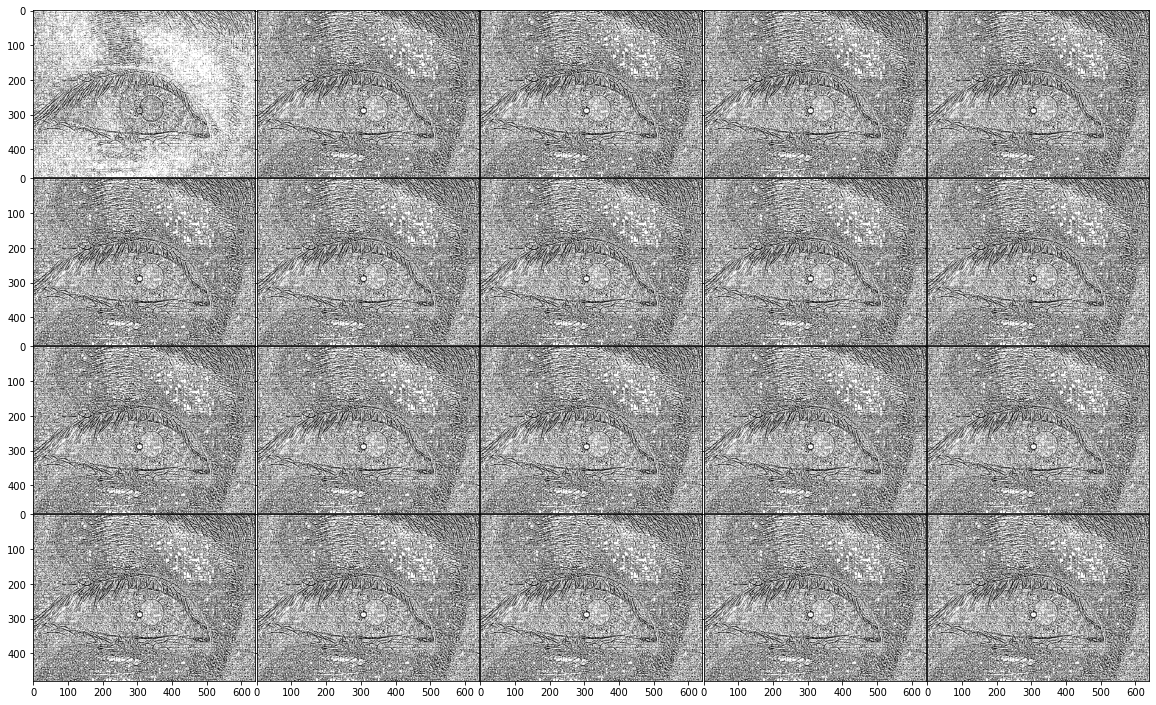

In [102]:
imgs_threshold_adaptive = []
for img in imgs:
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imgt = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,1)
  imgs_threshold_adaptive.append(imgt)
plot_images(imgs_threshold_adaptive, 4, 5)

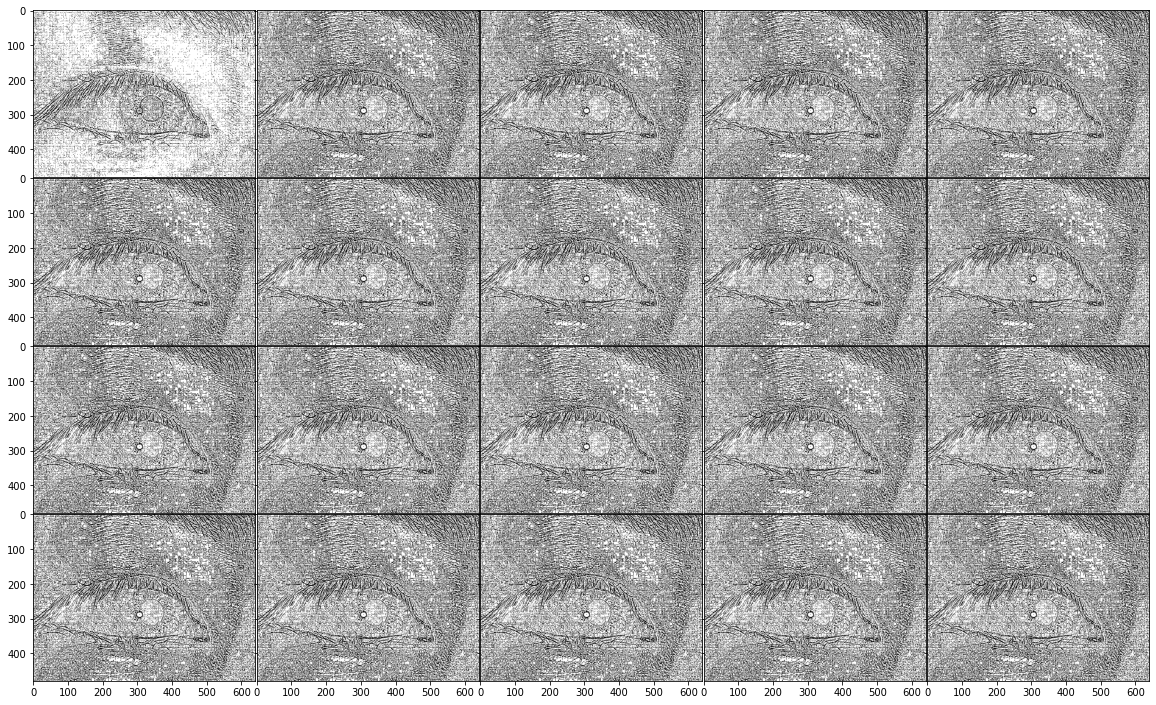

In [103]:
imgs_threshold_adaptive = []
for img in imgs:
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imgt = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,1)
  imgs_threshold_adaptive.append(imgt)
plot_images(imgs_threshold_adaptive, 4, 5)

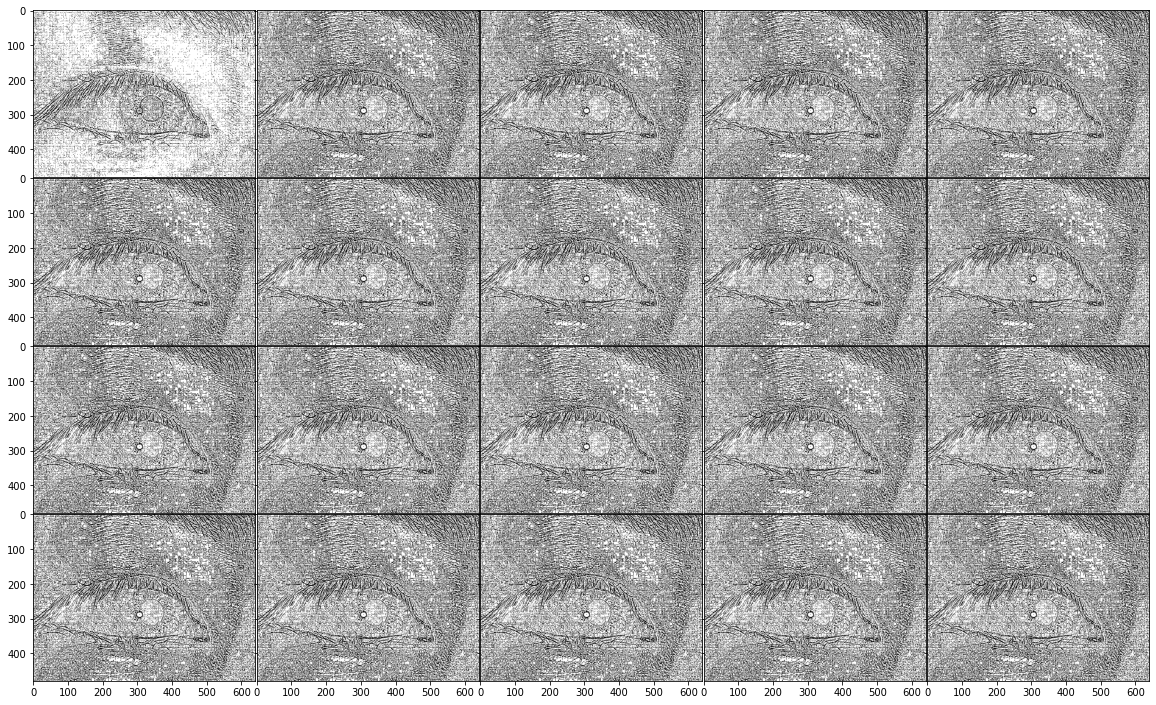

In [104]:
imgs_threshold2 = []
for img in imgs_threshold_adaptive:
  T,imgt = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  imgs_threshold2.append(imgt)
plot_images(imgs_threshold2, 4, 5)

## Canny Contourns

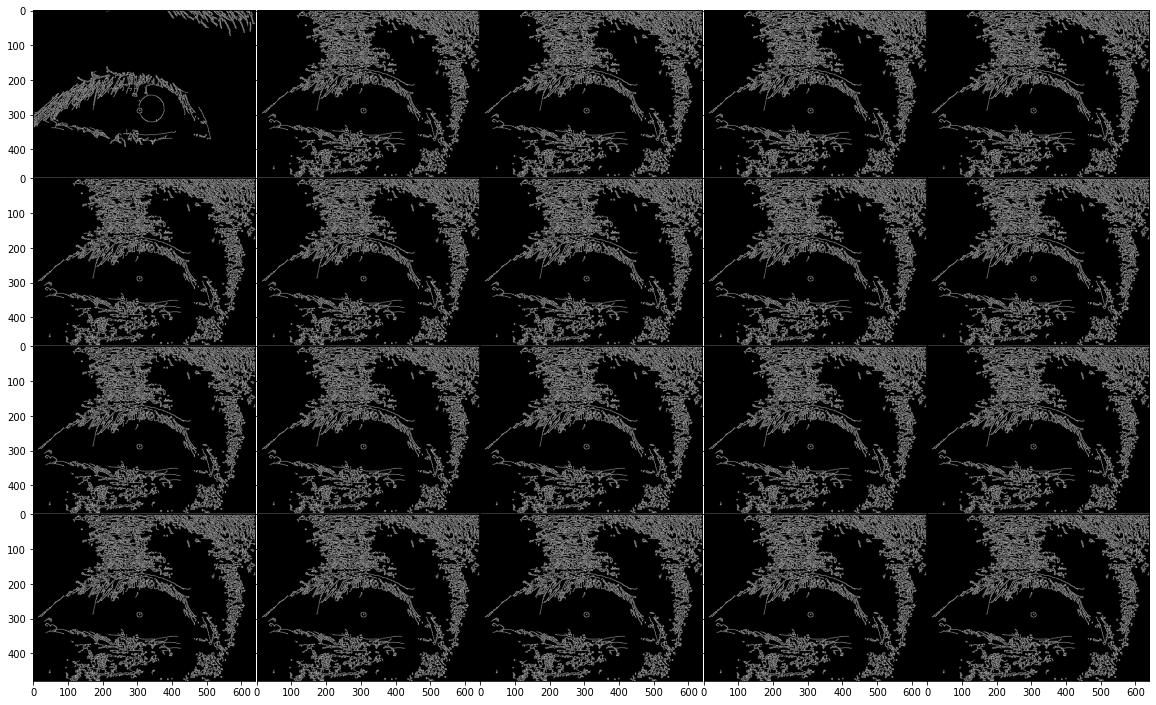

In [105]:
imgs_canny = []
for img in imgs:
  edges = cv2.Canny(img,30,150)
  imgs_canny.append(edges)
plot_images(imgs_canny, 4, 5)

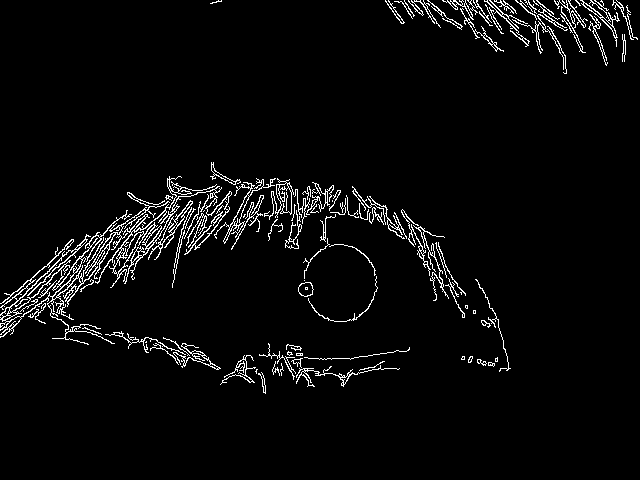

In [106]:
circles = []
circles = None

circles = cv2.HoughCircles(imgs_canny[0], cv2.HOUGH_GRADIENT,2,40,param1=50,param2=100,minRadius=10,maxRadius=50)

bgr = cv2.cvtColor(imgs_canny[0], cv2.COLOR_GRAY2BGR)
if circles is not None:
  circles = np.uint16(np.around(circles))
  circles = circles[0]
  print(circles)

  for i in circles:
    cv2.circle(imgs_canny[0], (i[0],i[1]), i[2], (0,255,0), 2)
  
cv2_imshow(imgs_canny[0])

## Removing Noises with Filter2D

In [107]:

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

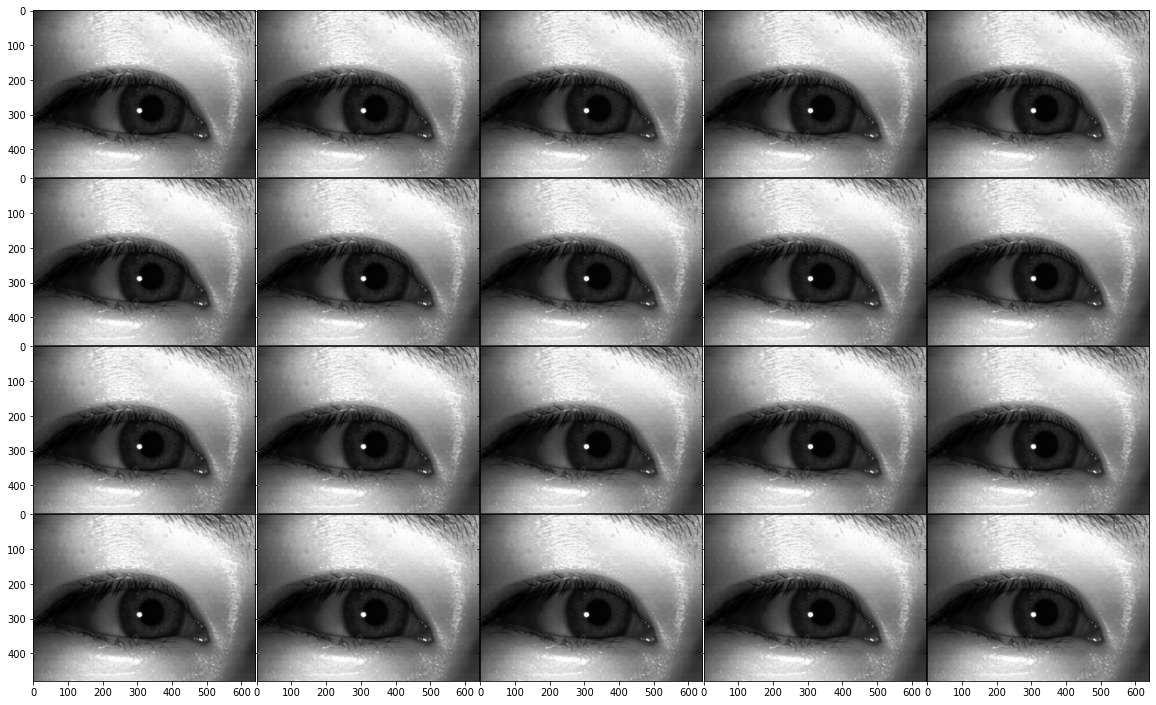

In [108]:
imgs_filter = []
for img in imgs_equalized:
  kernel = np.ones((3,3),np.float32)/9
  imgf = cv2.filter2D(img,-1,kernel)
  imgs_filter.append(imgf)
plot_images(imgs_filter, 4, 5)

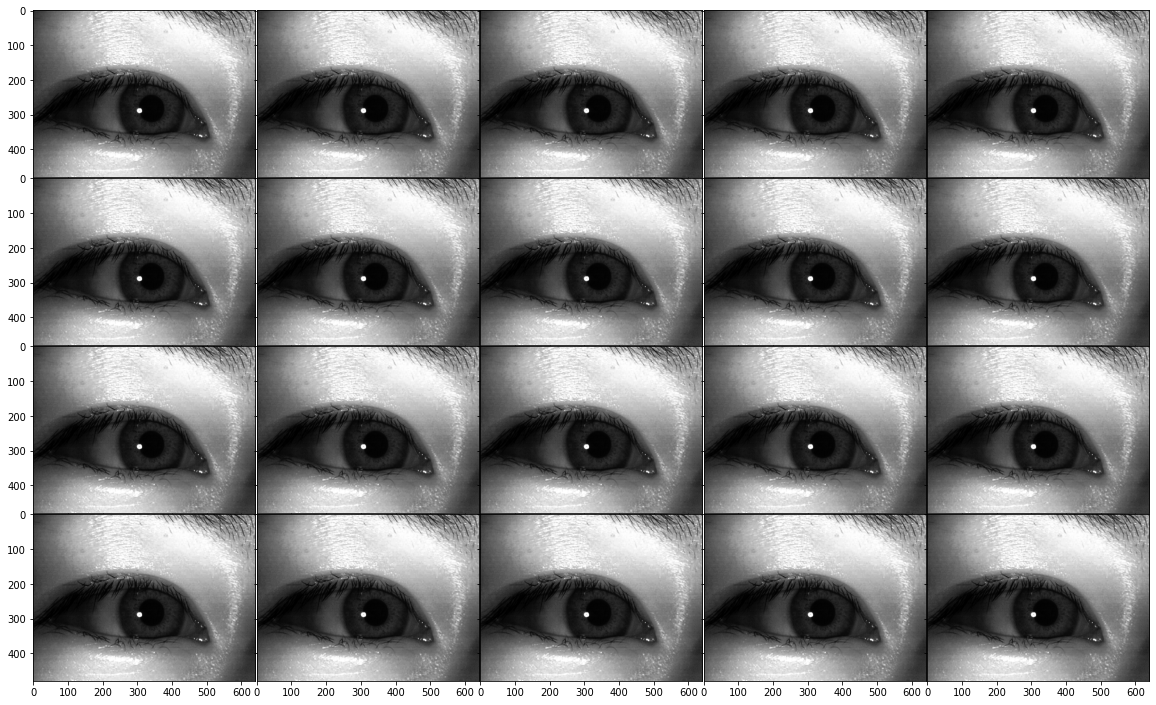

In [109]:
plot_images(imgs_equalized, 4, 5)

É possível perceber que nas imagens sem a remoção de ruído as iris são mais escuras que as imagems com a remoção de ruído

## Equalizing V axis with HSV

In [110]:
hsv_imgs = []
for img in imgs:
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  hsv_imgs.append(img_hsv)

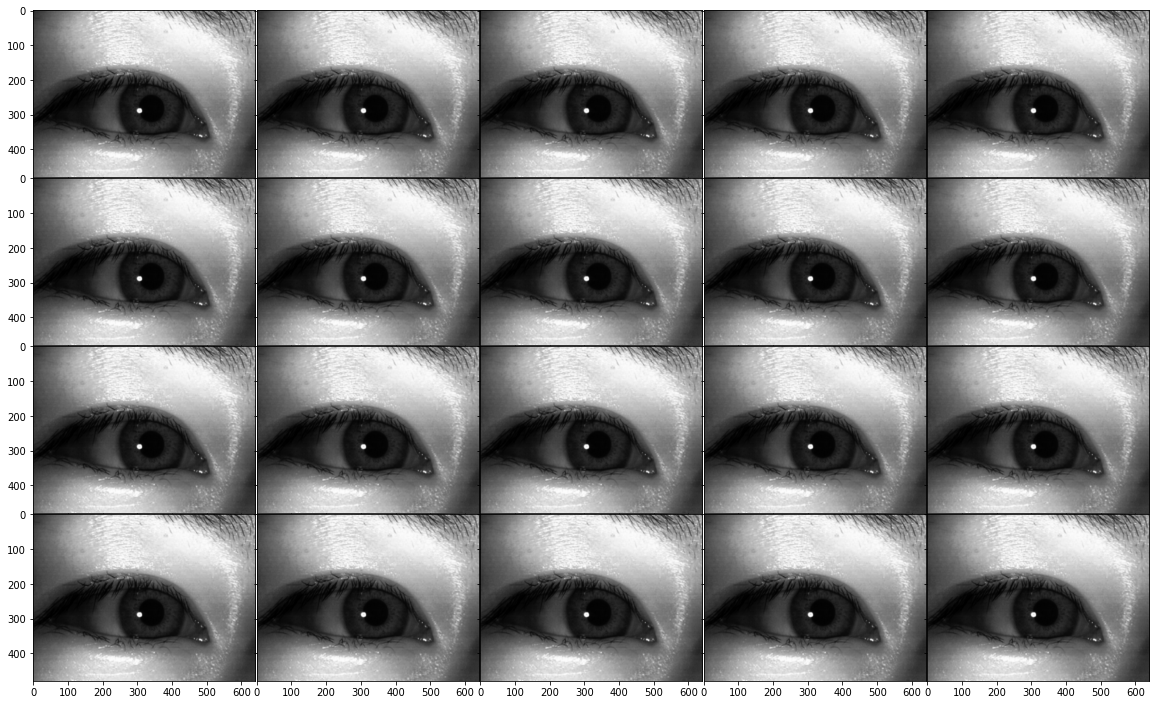

In [111]:
equalized_Vs = []
for img in hsv_imgs:
  H,S,V = cv2.split(img)
  V_equalized=cv2.equalizeHist(V)
  img_equalized = cv2.cvtColor(cv2.merge((H,S,V_equalized)), cv2.COLOR_HSV2BGR)
  blur_equalized = cv2.GaussianBlur(img_equalized,(3,3),cv.BORDER_DEFAULT)
  equalized_Vs.append(blur_equalized)
plot_images(equalized_Vs, 4, 5)